### Dependencias e imports

In [ ]:
%pip install -q plotly scipy
%pip install -q seaborn
%pip install -q --upgrade nbformat

import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

random.seed(28)
np.random.seed(28)


# Optimización con restricciones

## Ejercicio 1: Lagrange — Casos básicos (I)
Se pretende optimizar el siguiente problema:

$$

\begin{aligned}

\mathrm{maximizar} \quad f(x,y)= x + y & \\

\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 1

\end{aligned}

$$

usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:

In [ ]:
# Define the objective function f(x, y)
def f(x, y):
    return x + y

def grad_f(x, y):
    return np.array([1, 1])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **1a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerá el máximo del problema.

In [ ]:
# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = X + Y

# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot for the function f(x, y) = x + y
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(t)
circle_y = np.sin(t)

trace_circle_OXY = go.Scatter3d(
    x=circle_x,
    y=circle_y,
    z=np.zeros_like(circle_x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

# Create the 2D circle projection onto the plane z = x + y
trace_circle_proj = go.Scatter3d(
    x=circle_x,
    y=circle_y,
    z=np.cos(t) + np.sin(t),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)


# Add the 2D circle curve and its projection to the 3D plot
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

# Show the 3D plot
fig.show()

 - **1b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

In [ ]:
from scipy.optimize import fsolve

def equations(vars):
    x, y, lamb = vars
    eq1 = 1.0 + lamb*2.0*x
    eq2 = 1.0 + lamb*2.0*y
    eq3 = x**2 + y**2 - 1.0

    return [eq1, eq2, eq3]

x_sol, y_sol, lamb_sol = fsolve(equations, (1.0, 1.0, -1.0))

print(f"La solución es {x_sol=}, {y_sol=}, {lamb_sol=}")

 - **1c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

In [ ]:
import numpy as np

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [-1/np.sqrt(2), 1/np.sqrt(2)]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 20  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')


# Highlight the optimal points
optimal_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2))]
optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

**Esta gráfica la pueden preguntar en la defensa**: por qué los vectores son paralelos?
Porque para los mínimos y máximos son puntos tangentes a la circunferencia (área restringida), y que además deben tener un gradiente perpendicular a la dirección de crecimiento de la función.

 - **1d** Vuelve a resolver el problema de optimización, pero ahora hazlo minimizando la función lagrangiana $\mathcal{L}$ directamente con alguna herramienta numérica (no derives). Usa de nuevo el módulo ```scipy.optimize```. Comprueba que obtienes el mismo resultado que en el apartado anterior.

In [ ]:
from scipy.optimize import minimize

def lagrangian_one_arg(vars):
    x, y, lambda_ = vars
    return lagrangian(x, y, lambda_)

res = minimize(lagrangian_one_arg, (0.0, 0.0, 0.0))
print(f"La solución es {res.x[0]=}, {res.x[1]=}, {res.x[2]=}")

 - **1e** Una vez más, utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

In [ ]:
from scipy.optimize import minimize

def f_one_arg(vars):
    x, y = vars
    return f(x, y)

def g_one_arg(vars):
    x, y = vars
    return g(x, y)

constraints = [{'type': 'eq', 'fun': g_one_arg}]
x0 = (-1.0, -1.0)

res = minimize(f_one_arg, x0, constraints=constraints)
print(f"La solución es {res.x[0]=}, {res.x[1]=}, {res.multipliers=}")

## Ejercicio 2: Lagrange — Casos básicos (II)

Se pretende optimizar el siguiente problema:
$$
\begin{aligned}
\mathrm{maximizar} \quad f(x,y)= (x + y)^2 & \\
\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 1
\end{aligned}
$$
usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:



In [ ]:
# Define the objective function f(x, y)
def f(x, y):
    return (x + y)**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **2a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerán los máximos del problema.

In [ ]:
# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X,Y)
# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)

trace_circle_OXY = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=np.zeros_like(x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

trace_circle_proj = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=f(np.cos(t), np.sin(t)),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)

# Add the 2D circle projection onto the OXY plane
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

fig.show()


 - **2b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

In [ ]:
from scipy.optimize import fsolve

def equations(vars):
    x, y, lamb = vars
    eq1 = 1.0 + lamb*2.0*x
    eq2 = 1.0 + lamb*2.0*y
    eq3 = x**2 + y**2 - 1.0

    return [eq1, eq2, eq3]

x_sol, y_sol, lamb_sol = fsolve(equations, (1.0, 1.0, -1.0))

print(f"La solución es {x_sol=}, {y_sol=}, {lamb_sol=}")

 - **2c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [0, -2]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 20  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')

# Highlight the optimal points
optimal_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2)),
                  (-1/np.sqrt(2), 1/np.sqrt(2)), (1/np.sqrt(2), -1/np.sqrt(2))]
optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

 - **2d** Utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

In [ ]:
from scipy.optimize import minimize

# Implementa aquí tu solución

## Ejercicio 3: Lagrange — Casos básicos (III)

Se pretende optimizar el siguiente problema:
$$
\begin{aligned}
\mathrm{maximizar} \quad f(x,y)= x^2y & \\
\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 3
\end{aligned}
$$
usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:



In [ ]:
# Define the objective function f(x, y)
def f(x, y):
    return x**2 * y

def grad_f(x, y):
    return np.array([2*x*y, x**2])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 3

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **3a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerán los máximos del problema.

In [ ]:
# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X,Y)
# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)

trace_circle_OXY = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=np.zeros_like(x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

trace_circle_proj = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=f(np.cos(t), np.sin(t)),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)

# Add the 2D circle projection onto the OXY plane
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

fig.show()


 - **3b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

In [ ]:
from scipy.optimize import fsolve

# Implementa aquí tu solución

 - **3c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [-1, 1, 0]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 26  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')

# Highlight the optimal points
optimal_points = [(np.sqrt(2), 1),  (-np.sqrt(2), 1),
                  (np.sqrt(2),-1), (-np.sqrt(2),-1),
                  (0, np.sqrt(3)), (0,-np.sqrt(3))]

optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

 - **3d** Utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

In [ ]:
from scipy.optimize import minimize

# Implementa aquí tu solución

## Ejercicio 4: [KKT] Restricciones con inecuaciones — caso 1

Resuelve el siguiente problema de optimización utiliza el módulo ```scipy.optimize``` (en particular, la función ```minimize```).
<center>
<div>
<img src="https://drive.upm.es/public.php/dav/files/YzvqwRjVh1U0aXy/" width="450"/>
</div>
</center>


$$
\begin{aligned}
\mathrm{minimizar} \quad q(x)=\left(x_1-1\right)^2+\left(x_2-2.5\right)^2 & \\
\text { sujeto a} \quad x_1-2 x_2+2 & \geq 0, \\
-x_1-2 x_2+6 & \geq 0, \\
-x_1+2 x_2+2 & \geq 0, \\
x_1 & \geq 0, \\
x_2 & \geq 0 .
\end{aligned}
$$

In [ ]:
from scipy.optimize import minimize

def target(x):
    x1, x2 = x
    return (x1 - 1.0)**2 + (x2 - 2.5)**2  # q(x)

constraints = [
    {'type': 'ineq', 'fun': lambda x:  x[0] - 2.0*x[1] + 2.0},  # c1(x) >= 0
    {'type': 'ineq', 'fun': lambda x: -x[0] - 2.0*x[1] + 6.0},  # c2(x) >= 0
    {'type': 'ineq', 'fun': lambda x: -x[0] + 2.0*x[1] + 2.0},  # c3(x) >= 0
    {'type': 'ineq', 'fun': lambda x: x[0]},  # c4(x) >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]}   # c5(x) >= 0
]
x0 = np.array([1.0, 1.0])

res = minimize(target, x0, constraints=constraints)

print(f"La solución es {res.x[0]=}, {res.x[1]=}, {res.multipliers=}")

## Ejercicio 5: [KKT] Restricciones con inecuaciones — caso 2

Resuelve el siguiente problema de optimización utiliza el módulo ```scipy.optimize``` (en particular, la función ```minimize```).
$$
\begin{aligned}
\mathrm{minimizar} \quad q(x) = 2x_1 + 3x_2 + 4x_1^2 + 2x_1x_2 + x_2^2 & \\
\text { sujeto a} \quad x_1 - x_2 \geq 0, \\
x_1 + x_2 \leq 4, \\
x_1 \leq 3, \\
\end{aligned}
$$

In [ ]:
from scipy.optimize import minimize

def target(x):
    x1, x2 = x
    return 2.0 * x1 + 3.0 * x2 + 4.0 * x1**2 + 2.0 * x1 * x2 + x2**2  # q(x)

constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0] - x[1]},  # c1(x) >= 0
    {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 4.0},  # c2(x) >= 0
    {'type': 'ineq', 'fun': lambda x: -x[0] + 3.0},  # c3(x) >= 0
]
x0 = np.array([1.0, 1.0])

res = minimize(target, x0, constraints=constraints)

print(f"La solución es {res.x[0]=}, {res.x[1]=}, {res.multipliers=}")

## Ejercicio 6: Estudio analítico de un algoritmo de optimización numérica

Como has visto en los ejercicios anteriores, la función ```minimize``` del módulo ```scipy.optimize``` es ampliamente usada para problemas de optimización no entera. Esta función implementa multitud de algoritmos que permiten resolver problemas de diversa índole: con información sobre el jacobiano/hessiano o sin ella, problemas acotados, con restricciones de igualdad o de desigualdad, etc.

Explica un algoritmo de los implementados en la función ```minimize``` ([ver documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#id9), argumento ```method```), según la siguiente asignación:

 - **Algoritmo BFGS**: grupos 1, 4, 7
 - **Nelder Mead**: grupos 2, 5, 8
 - **Newton-CG**: grupos 3, 6, 9, 10

*Escribe una breve explicación (aprox. 1 cara de A4) para la entrega, y estate preparado para explicar el método en la defensa*.

## Ejercicio 7: Casos de aplicación (I)

El departamento financiero de una empresa de venta y reparación de ordenadores desea maximizar su beneficio mensual ($B$) que depende de las unidades vendidas ($v$), las unidades reparadas ($r$), el número de trabajadores ($t$), y el número de clientes ($c$). El beneficio se puede modelar como sigue:

$$
B(v, r, t, c) = 20000 - 4(v - 100)^2 - 3(r - 50)^2 - t^2 + 5c^2
$$

Se sabe que la expresión anterior funciona correctamente solo cuando las unidades vendidas ($v$) están en el rango de $5$ a $100$, el número de trabajadores ($t$) es menor que $100$ y el número de ordenadores vendidos ($v$) más reparados ($r$) es menor que $102$. Además, por imposición del departamento laboral, la empresa debe contar con como mínimo dos trabajadores ($t$) por cada cliente ($c$).
 - **7a** Calcula $(v, r, t, c)$ que maximizan los beneficios de la empresa por *fuerza bruta*.


In [ ]:
from itertools import product

def target(v:int, r:int, t:int, c:int) -> float:
    return 20000 - 4.0 * (v -100.0)**2 - 3.0 * (r - 50.0)**2 - t**2 + 5.0 * c**2

vs = range(5, 101)
rs = range(0, 100)
ts = range(0, 100)
cs = range(0, 100)

solution = None
current_max = 0.0

for v, r, t, c in product(vs, rs, ts, cs):
    if v + r >= 102:
        continue
    if t < 2.0 * c:
        continue
    target_in_candidate = target(v, r, t, c)
    if target_in_candidate > current_max:
        current_max = target_in_candidate
        solution = (v, r, t, c)

print(f"La solución es {solution=}, con valor {current_max=}")

 - **7b** Calcula $(v, r, t, c)$ que maximizan los beneficios de la empresa utilizando la librería ```gurobipy``` de Python.

In [ ]:
# %pip install -q gurobipy

In [ ]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("profit_max")

v = model.addVar(lb=5, ub=100, vtype=GRB.INTEGER, name="v")
r = model.addVar(lb=0, vtype=GRB.INTEGER, name="r")
t = model.addVar(lb=0, ub=99, vtype=GRB.INTEGER, name="t")
c = model.addVar(lb=0, vtype=GRB.INTEGER, name="c")

model.setObjective(20000 - 4.0 * (v -100.0)**2 - 3.0 * (r - 50.0)**2 - t**2 + 5.0 * c**2, GRB.MAXIMIZE)

model.addConstr(v + r <= 101, "units_sold_repaired_limit")
model.addConstr(2.0 * c <= t, "ratio_t_c")

model.optimize()

print(f"La solución es v={v.X}, r={r.X}, t={t.X}, c={c.X}, con valor {model.ObjVal=}")

## Ejercicio 8: Casos de aplicación (II)

Considera una cierta empresa que produce dos artículos: tazas y platos. Esto es lo que sabemos:

 - Una vez fabricada, una taza se vende a 27 € y un plato a 21 €.
 - Cada taza cuesta 10 € en materiales y 14 € en mano de obra (fijos).
 - Cada plato cuesta 9 € en materiales y 10 € en mano de obra (fijos).
 - Para fabricar cada taza se necesitan 2.2 horas de trabajo.
 - Para fabricar cada plato se necesita 1 hora de trabajo.
 - La empresa dispone de una cantidad ilimitada de materias primas.
 - Debido al número limitado de trabajadores, la empresa dispone de un máximo de 100 horas de mano de obra.
 - La demanda de tazas es ilimitada, pero la de platos es de 30 unidades.

El objetivo de la empresa es maximizar los beneficios. Resuelve este problema de optimización usando el paquete ```gurobipy```.

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Implementa aquí tu solución

## Ejercicio 9: Regresión lineal por descenso de gradiente

Sea una función que aplica la transformación $wx + b$ a un único input $x$, siendo $w$ y $b$ parámetros a determinar. De dicha transformación se obtiene un valor que llamaremos $y_{\mathrm{pred}}$. Se disponen de unos datos de entrenamiento $y_{\mathrm{true}}$. Para un determinado batch de observaciones, el objetivo es determinar los valores óptimos de $w$ y $b$ que minimizan el error cuadrático medio $MSE$ aplicando la técnica de descenso de gradiente.

<center>
<div>
<img src="https://drive.upm.es/s/EkosnRQDSXNGj3L/download" width="250"/>
</div>
</center>

- **9a** Completa la siguiente estructura de código que permite simular el problema anterior.

<!-- - **9a** Completa la siguiente estructura de código que permite simular una red neuronal **con una única capa, una única neurona y un único input**. La función de activación que se usará es la LINEAL, lo que es análogo a no usar función de activación alguna, por lo que la omitiremos por simplicidad.
-->

In [ ]:
# Completa los espacios marcados con #######

import numpy as np

class Single_Neuron_Layer:

    def __init__(self, n_inputs: int) -> None:
        self.weights = #######
        self.bias = #######

    def forward(self, inputs) -> None:
        self.inputs = inputs
        self.output = #######

    def backward(self, dvalues) -> None:
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbias = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


class Optimizer_SGD:

    def __init__(self, learning_rate=1.0) -> None:
        self.learning_rate = learning_rate

    def update_params(self, layer) -> None:

        weight_updates = #######
        bias_updates = #######

        layer.weights += weight_updates
        layer.bias += bias_updates


class Loss_MeanSquaredError():

    #Forward pass
    def forward(self, y_pred, y_true):
        sample_losses = #######
        return sample_losses

    #Backward pass
    def backward(self, y_pred, y_true) -> None:
        # Implementa aquí tu solución

 - **9b** Realiza un entrenamiento sobre los siguientes datos, y observa el resultado obtenido. En particular, asegúrate que $w$ y $b$ coinciden con los que obtendrías resolviendo el problema de regresión de forma tradicional (derivando el MSE respecto a cada parámetro, igualando a cero y resolviendo el sistema resultante).
$$
\begin{array}{|c|c|}
\hline x_i & y_i \\
\hline 1 & 6 \\
\hline 2 & 5 \\
\hline 3 & 7 \\
\hline 4 & 10 \\
\hline
\end{array}
$$


In [ ]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([6, 5, 7, 10]).reshape(-1, 1)  # Target values

# Se visualizan los datos
plt.plot(X, y, 'ro')

# Implementa aquí tu solución

## Ejercicio 10: Regresión multilineal

Ahora utilizaremos la base de datos ```diabetes``` del paquete ```scikit-learn```, que contiene datos de pacientes con diabetes (10 variables por observación), y una medida de la evolución de la enfermedad en un periodo de un año (variable a predecir $y$). Por tanto, ahora estamos en un caso de regresión multilineal: queremos ajustar una función del tipo

$$
\hat{y} = b + w_0 x_0 + w_1 x_1 + \ldots + w_{9} x_{9}
$$

Donde $b, w_0, w_1 \ldots, w_{9}$ son los coeficientes de regresión que deseamos estimar, $x_1, x_2, \ldots, x_{9}$ son las variables independientes.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target'].reshape(-1, 1)

Define una arquitectura apropiada análoga a la del ejercicio anterior. Realiza el entrenamiento y grafica alguna variable junto a la proyección del hiperplano para comprobar resultados

In [ ]:
# Implementa aquí tu solución

# Clustering

## Ejercicio 11: Implementación del Algoritmo K-Means

El objetivo de este ejercicio es implementar desde cero el algoritmo de clustering K-Means en Python. Este algoritmo puede resumirse de la siguiente forma:

Para unos datos dados, $k$ denota el número de "grupos" (*clusters*) distintos presentes en los datos. Cada uno de estos grupos tendrá un determinado centroide. El algoritmo comienza inicializando aleatoriamente la posición de estos centroides. Luego se realizan iteraciones para optimizar las ubicaciones de estos $k$ centroides de la siguiente manera:

 - Se calcula la distancia de cada uno de los punto a cada centroide.
 - Los puntos se asignan al cluster del centroide más cercano.
 - Los centroides se desplazan para ser el valor promedio de los puntos que les pertenecen. Si los centroides no se mueven, el algoritmo termina, de lo contrario, se repiten los pasos anteriores una iteración más.

Se trabajará con los siguientes datos:

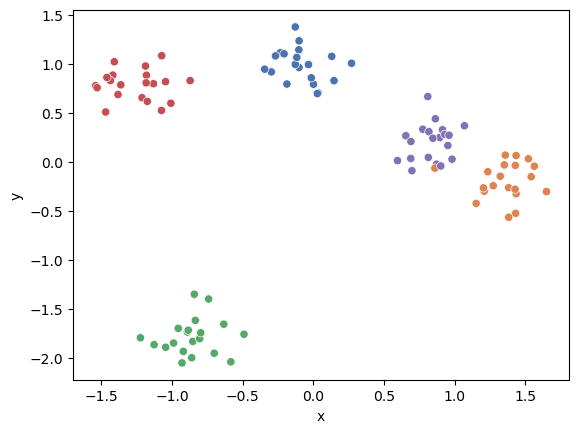

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Para implementar el algoritmo k-means que clasifique los datos anteriores, sigue los siguientes pasos:

 - **11a** Implementa una función que calcule la distancia euclidiana entre un punto ```point``` y un conjunto de puntos ```centroids```.

In [2]:
# implementa tu solución en la siguiente función

def euclidean(point, centroids):
    """
    Euclidean distances between a point (array-like) and some centroids (array-like).
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    Example:
    > point: (1,2)
    > centroids: [(0,3), (4,5), (5,9)]
    > result: [2.23606798, 4.47213595, 8.06225775]
    """
    # calculate distances
    point = np.array(point)
    centroids = np.array(centroids)
    distances = np.linalg.norm(centroids - point, axis=1)
    return distances

In [3]:
point= [1,2]
centroids= [[0,3], [4,5], [5,9]]
print(euclidean(point, centroids))

[1.41421356 4.24264069 8.06225775]


 - **11b** Completa la implementación de la siguiente clase para que implemente la lógica descita arriba sobre el algoritmo k-means.

In [4]:
# Completa las líneas marcadas con #######

from numpy.random import uniform

class KMeans:
    """
    KMeans clustering algorithm.
    """

    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        """
        Initialize the KMeans object.

        Parameters:
        n_clusters (int): The number of clusters to form. Default is 8.
        max_iter (int): Maximum number of iterations of the k-means algorithm for a single run. Default is 300.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state  # Store the provided random state


    def _update_centroids(self, X_train, prev_centroids):
        """
        Assign each point in X_train to the nearest centroid,
        and compute new centroids as the mean of assigned points.
        If a centroid has no points, keep its previous position.
        """
        sorted_points = [[] for _ in range(self.n_clusters)]

        for x in X_train:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            sorted_points[centroid_idx].append(x)

        new_centroids = []
        for i, points in enumerate(sorted_points):
            if len(points) > 0:
                new_centroids.append(np.mean(points, axis=0))
            else:
                # keep old centroid if cluster is empty
                new_centroids.append(prev_centroids[i])
        return np.array(new_centroids)

    def fit(self, X_train):
        """
        Compute k-means clustering. Centroids will be stored in a class variable called "self.centroids"

        Parameters:
        X_train (array-like): Training instances to cluster. It must be a 2D array-like object.
        """

        # Set the random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Randomly select centroid start points, uniformly distributed across the domain of the dataset
        min_, max_ = X_train.min(), X_train.max()
        self.centroids = uniform(min_, max_, size=(self.n_clusters, X_train.shape[1]))

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while iteration < self.max_iter and not np.array_equal(prev_centroids, self.centroids):  # El profesor ha dicho de usar all closed de numpy para la segunda condición

            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]

            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X_train, prev_centroids)

            # Catch any np.nans, resulting from a centroid having no points
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]

            iteration += 1

    def evaluate(self, X):
        """
        Evaluates a set of points 'X' in reference to the centroids that we
        have optimized to our training set. This method returns the centroid
        and the index of that centroid for each point.

        Parameters:
        X (array-like): Points to evaluate.
        """
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

 - **11c** Evalúa el algoritmo que has programado sobre los datos de entrenamiento. Para ello, ejecuta la siguiente celda que generará una gráfica donde se muestran los grupos originales en código de color, la clasificación hecha por el algoritmo (indicada por las formas de los puntos) y la posición de los centroides. Comenta los resultados.

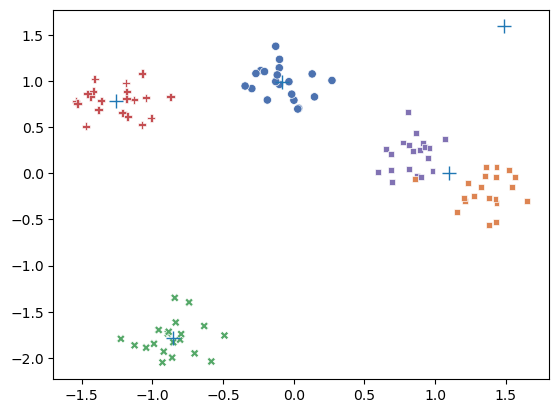

In [5]:
kmeans = KMeans(n_clusters=centers, random_state=28)  # For example
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()

 - **11d** El algoritmo anterior presenta problemas en la forma en la que se inicializan las posiciones de los centroides. Hay dos cuestiones principales:
   - Si un centroide se inicializa lejos de cualquier grupo, es improbable que se mueva.
   - Si los centroides se inicializan demasiado cerca, es poco probable que diverjan entre sí.

Actualiza la clase que del apartado anterior (comienza a partir de una copia) con un nuevo proceso de inicialización de la ubicación de los centroides. 

   1. Inicializar el primer centroide seleccionándolo aleatoriamente de entre los puntos "dato".
   2. Calcular la suma de las distancias entre cada dato y todos los actuales candidatos a centroides iniciales.
   3. Seleccionar el siguiente centroide de manera aleatoria, con una probabilidad proporcional a la distancia total a los centroides.
   4. Volver al paso 2. Repetir hasta que todos los centroides hayan sido inicializados.


In [6]:
# implementa aquí tu solución
class KMeansImproved:
    """
    KMeans clustering algorithm with smarter centroid initialization
    (similar to K-Means++).
    """

    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def _initialize_centroids(self, X_train):
        """
        Initialize centroids using a distance-weighted probability method:
        1. Choose one random point as the first centroid.
        2. For each subsequent centroid:
            - Compute distance of each point to the nearest existing centroid.
            - Choose the next centroid with probability proportional to that distance.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        centroids = [X_train[np.random.randint(0, len(X_train))]]

        for _ in range(1, self.n_clusters):
            dist_sq = np.array([
                np.min(euclidean(x, np.array(centroids))) for x in X_train
            ])

            probabilities = dist_sq / np.sum(dist_sq)

            next_centroid = X_train[np.random.choice(len(X_train), p=probabilities)]
            centroids.append(next_centroid)

        return np.array(centroids)

    def _update_centroids(self, X_train, prev_centroids):
        """Asignar puntos y recalcular centroides, manejando clusters vacíos."""
        sorted_points = [[] for _ in range(self.n_clusters)]

        for x in X_train:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            sorted_points[centroid_idx].append(x)

        new_centroids = []
        for i, points in enumerate(sorted_points):
            if len(points) > 0:
                new_centroids.append(np.mean(points, axis=0))
            else:
                new_centroids.append(prev_centroids[i])
        return np.array(new_centroids)

    def fit(self, X_train):
        """Entrena el modelo K-Means con inicialización mejorada."""
        self.centroids = self._initialize_centroids(X_train)

        iteration = 0
        prev_centroids = None

        while iteration < self.max_iter and (
            prev_centroids is None or not np.allclose(prev_centroids, self.centroids)
        ):
            prev_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X_train, prev_centroids)
            iteration += 1

    def evaluate(self, X):
        """Evalúa los puntos respecto a los centroides entrenados."""
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

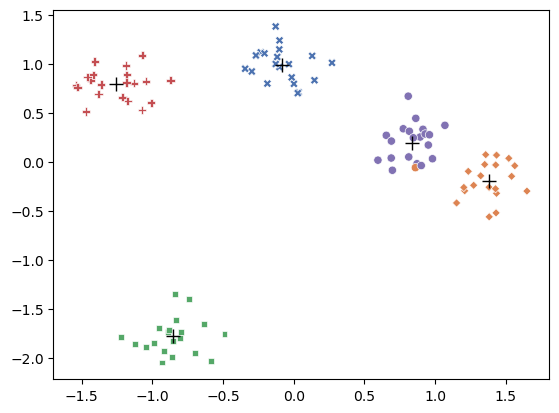

In [8]:
#Una vez completado el ejercicio 11d, puedes evaluar los resultados con:

centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = [x for x in X_train]
X_train = StandardScaler().fit_transform(X_train)

# Fit centroids to dataset
kmeans = KMeansImproved(n_clusters=centers, random_state=28)  # For example
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()